In [1]:
!pip install tensorflow-gpu==2.0rc

     |████████████████████████████████| 380.5MB 62kB/s 
     |████████████████████████████████| 4.3MB 31.4MB/s 
     |████████████████████████████████| 501kB 46.1MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D , MaxPool1D , Dropout , BatchNormalization , Flatten , Dense

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [0]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')

In [7]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [0]:
X = data.drop(['ID','TARGET'],axis = 1)

In [10]:
X.shape

(76020, 369)

In [0]:
y = data["TARGET"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0,stratify = y)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [0]:
fil = VarianceThreshold(0.01)
X_train = fil.fit_transform(X_train)
X_test = fil.transform(X_test)

In [0]:
X_train_T = X_train.T
X_test_T = X_test.T

In [0]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [22]:
X_train_T.duplicated().sum()

17

In [0]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]

In [24]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [25]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256, 1)

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [0]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
batch_normalization_6 (Batch (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 127, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_7 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 62, 64)           

In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 107s 2ms/sample - loss: 0.2055 - accuracy: 0.9559 - val_loss: 0.1810 - val_accuracy: 0.9537
Epoch 2/10
60816/60816 [==============================] - 105s 2ms/sample - loss: 0.1748 - accuracy: 0.9594 - val_loss: 0.1729 - val_accuracy: 0.9604
Epoch 3/10
60816/60816 [==============================] - 106s 2ms/sample - loss: 0.1686 - accuracy: 0.9601 - val_loss: 0.1720 - val_accuracy: 0.9603
Epoch 4/10
60816/60816 [==============================] - 105s 2ms/sample - loss: 0.1633 - accuracy: 0.9604 - val_loss: 0.1675 - val_accuracy: 0.9603
Epoch 5/10
60816/60816 [==============================] - 106s 2ms/sample - loss: 0.1616 - accuracy: 0.9604 - val_loss: 0.1681 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 105s 2ms/sample - loss: 0.1617 - accuracy: 0.9604 - val_loss: 0.1639 - val_accuracy: 0.9604
Epoch 7/10
60816/60816 [==========================

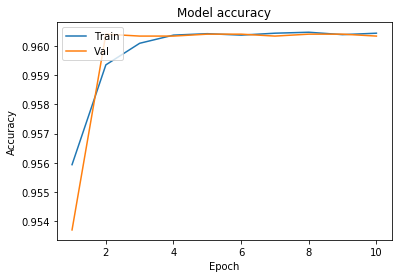

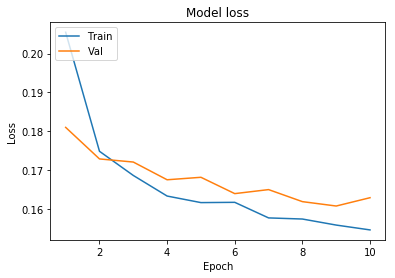

In [41]:
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()